In [15]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import gzip

from dataloader import MultimodalDataset, imageDataset
from network import ImageDataCNN, MixedDataCNN

# Convolutional Neural Network

### Load in last checkpoint

In [16]:
# Load the model
checkpoint_path = 'model_checkpoints/nn_epoch_9.pth'
checkpoint = torch.load(checkpoint_path)

# Create an instance of your model
model = ImageDataCNN()

# Load the model state dictionary from the checkpoint
model.load_state_dict(checkpoint['model_state_dict'])


<All keys matched successfully>

### Load in entire dataset

In [17]:
image_target_data = pd.read_csv('data\\target_preprocessed.csv')
features_data = pd.read_csv('data\\features_preprocessed.csv')

# Seperate out the age and filenames
target_age = image_target_data['age']
target_filename = image_target_data['filename']

# Convert test data to lists
target_age_test = target_age.tolist()
target_filename_test = target_filename.tolist()
features_data_test = features_data.values.tolist()

### Test model on entire dataset

Number of correct predictions within 10 years: 3809551
Accuracy within 10 years: 86.26%


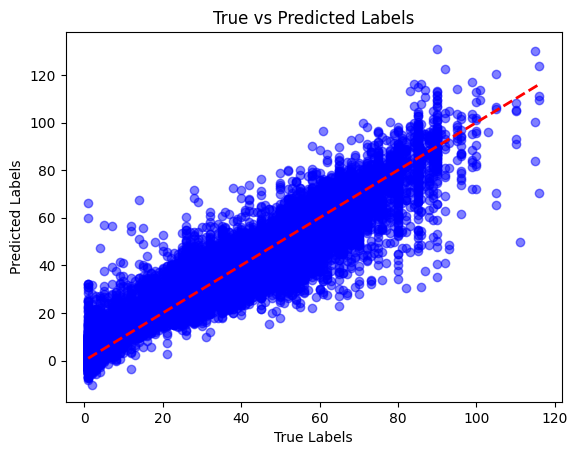

In [18]:
# Define data loader
file_path = 'data\\images'
test_loader = imageDataset(file_path, 64, len(target_age_test), target_age_test, target_filename_test, True)

# This will set a tolerance level, where ages +/- 10 away from the actual target will be counted as correct
tolerance = 10

# Test the model
model.eval()
correct_predictions = 0
predictions = []
true_labels = []
total_samples = 0
with torch.no_grad():
    for _ in range(test_loader.num_batches_per_epoch):
        images, target = test_loader.generate_batch()
        test_outputs = model(images)
        
        # Flatten the predictions and true labels for regression
        predictions.extend(test_outputs.numpy().flatten())
        true_labels.extend(target.numpy().flatten())

        # Count correct predictions within the tolerance range
        correct_predictions += np.sum(np.abs(np.array(predictions) - np.array(true_labels)) <= tolerance) # counts predictions that fall within +/- 10 years
        total_samples += np.sum(np.abs(np.array(predictions) - np.array(true_labels)) <= 100) # counts all predictions



# Calculate accuracy within the tolerance range
accuracy_within_tolerance = (correct_predictions / total_samples) * 100


print(f"Number of correct predictions within {tolerance} years: {correct_predictions}")
print(f"Accuracy within {tolerance} years: {accuracy_within_tolerance:.2f}%")


plt.scatter(true_labels, predictions, color='blue', alpha=0.5)
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()


### Load in unseen data

In [19]:
# Load in test data from training phase
target_age_test = pd.read_csv('data\\CNN_age_test.csv')
target_filename_test = pd.read_csv('data\\CNN_filename_test.csv')

# convert to list
target_age_test = target_age_test['age'].tolist()
target_filename_test = target_filename_test['filename'].tolist()

### Test model on unseen data

Number of correct predictions within 10 years: 34183
Accuracy within 10 years: 72.17%


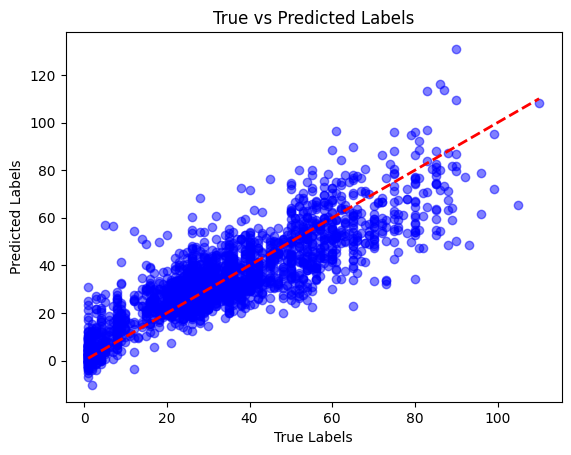

In [20]:
# Define data loader
file_path = 'data\\images'
test_loader = imageDataset(file_path, 64, len(target_age_test), target_age_test, target_filename_test, True)

# This will set a tolerance level, where ages +/- 10 away from the actual target will be counted as correct
tolerance = 10

# Test the model
model.eval()
correct_predictions = 0
predictions = []
true_labels = []
total_samples = 0
with torch.no_grad():
    for _ in range(test_loader.num_batches_per_epoch):
        images, target = test_loader.generate_batch()
        test_outputs = model(images)
        
        # Flatten the predictions and true labels for regression
        predictions.extend(test_outputs.numpy().flatten())
        true_labels.extend(target.numpy().flatten())

        # Count correct predictions within the tolerance range
        correct_predictions += np.sum(np.abs(np.array(predictions) - np.array(true_labels)) <= tolerance) # counts predictions that fall within +/- 10 years
        total_samples += np.sum(np.abs(np.array(predictions) - np.array(true_labels)) <= 100) # counts all predictions



# Calculate accuracy within the tolerance range
accuracy_within_tolerance = (correct_predictions / total_samples) * 100


print(f"Number of correct predictions within {tolerance} years: {correct_predictions}")
print(f"Accuracy within {tolerance} years: {accuracy_within_tolerance:.2f}%")


plt.scatter(true_labels, predictions, color='blue', alpha=0.5)
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()


# Multimodal Convolutinal Neural Network

### Load in the last checkpoint

In [21]:
# Load the model
checkpoint_path = 'model_checkpoints/multi_nn_epoch_9.pth'
checkpoint = torch.load(checkpoint_path)

# Create an instance of your model
model = MixedDataCNN(1,5)

# Load the model state dictionary from the checkpoint
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

### Load in entire dataset

In [22]:
image_target_data = pd.read_csv('data\\target_preprocessed.csv')
features_data = pd.read_csv('data\\features_preprocessed.csv')

# Seperate out the age and filenames
target_age = image_target_data['age']
target_filename = image_target_data['filename']

# Convert test data to lists
target_age_test = target_age.tolist()
target_filename_test = target_filename.tolist()
features_data_test = features_data.values.tolist()

### Test model on entire dataset

Number of correct predictions within 10 years: 1936321
Accuracy within 10 years: 43.84%


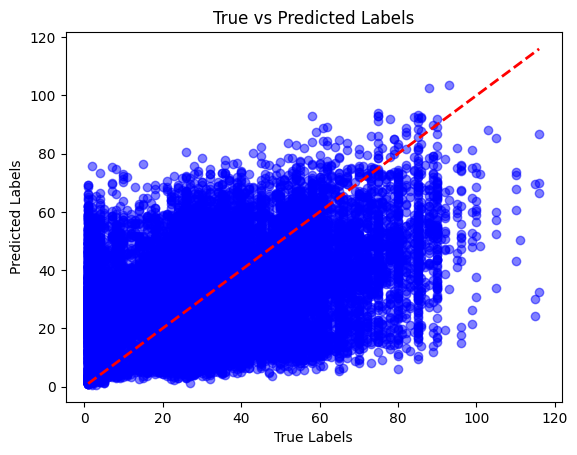

In [23]:
# Define data loader
file_path = 'data\\images'
test_loader = MultimodalDataset(file_path, 64, len(target_age_test), target_age_test, features_data_test, target_filename_test, True)

# This will set a tolerance level, where ages +/- 10 away from the actual target will be counted as correct
tolerance = 10

# Test the model
model.eval()
correct_predictions = 0
predictions = []
true_labels = []
total_samples = 0
with torch.no_grad():
    for _ in range(test_loader.num_batches_per_epoch):
        images, target, feature = test_loader.generate_batch()
        test_outputs = model(images, feature)
        
        # Flatten the predictions and true labels for regression
        predictions.extend(test_outputs.numpy().flatten())
        true_labels.extend(target.numpy().flatten())

        # Count correct predictions within the tolerance range
        correct_predictions += np.sum(np.abs(np.array(predictions) - np.array(true_labels)) <= tolerance) # counts predictions that fall within +/- 10 years
        total_samples += np.sum(np.abs(np.array(predictions) - np.array(true_labels)) <= 100) # counts all predictions



# Calculate accuracy within the tolerance range
accuracy_within_tolerance = (correct_predictions / total_samples) * 100


print(f"Number of correct predictions within {tolerance} years: {correct_predictions}")
print(f"Accuracy within {tolerance} years: {accuracy_within_tolerance:.2f}%")


plt.scatter(true_labels, predictions, color='blue', alpha=0.5)
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

### Load in unseen dataset

In [24]:
# Load in test data from training phase and covert to lists
target_data_test = pd.read_csv('data\\Multi_CNN_target_test.csv')
features_data_test = pd.read_csv('data\\Multi_CNN_features_test.csv')
target_age_test = target_data_test['age']
target_filename_test = target_data_test['filename']
target_age_test = target_age_test.tolist()
target_filename_test = target_filename_test.tolist()
features_data_test = features_data_test.values.tolist()


### Test model on unseen data

Number of correct predictions within 10 years: 71538
Accuracy within 10 years: 39.23%


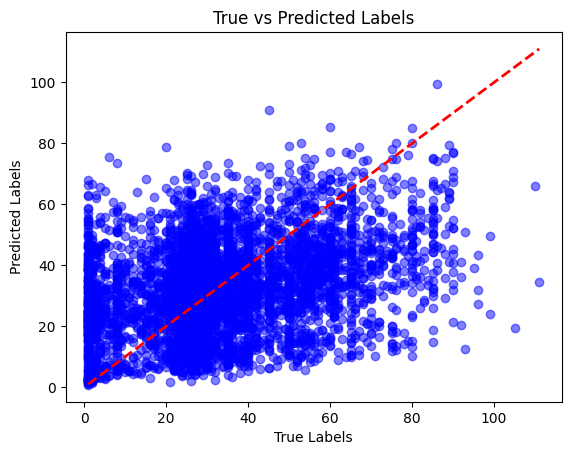

In [25]:
# Define data loader
file_path = 'data\\images'
test_loader = MultimodalDataset(file_path, 64, len(target_age_test), target_age_test, features_data_test, target_filename_test, True)

# This will set a tolerance level, where ages +/- 10 away from the actual target will be counted as correct
tolerance = 10

# Test the model
model.eval()
correct_predictions = 0
predictions = []
true_labels = []
total_samples = 0
with torch.no_grad():
    for _ in range(test_loader.num_batches_per_epoch):
        images, target, feature = test_loader.generate_batch()
        test_outputs = model(images, feature)
        
        # Flatten the predictions and true labels for regression
        predictions.extend(test_outputs.numpy().flatten())
        true_labels.extend(target.numpy().flatten())

        # Count correct predictions within the tolerance range
        correct_predictions += np.sum(np.abs(np.array(predictions) - np.array(true_labels)) <= tolerance) # counts predictions that fall within +/- 10 years
        total_samples += np.sum(np.abs(np.array(predictions) - np.array(true_labels)) <= 100) # counts all predictions


# Calculate accuracy within the tolerance range
accuracy_within_tolerance = (correct_predictions / total_samples) * 100


print(f"Number of correct predictions within {tolerance} years: {correct_predictions}")
print(f"Accuracy within {tolerance} years: {accuracy_within_tolerance:.2f}%")


plt.scatter(true_labels, predictions, color='blue', alpha=0.5)
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()